<a href="https://colab.research.google.com/github/j0rge-20/Precip/blob/main/Grafico_Prediccion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

#!pip install -q tensorflow-gpu
!pip install pandasql
!pip install pyyaml h5py 

import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import pandasql as ps
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

from sklearn.model_selection import train_test_split
from pandas.plotting import register_matplotlib_converters
from pandasql import sqldf
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Bidirectional
from keras.layers import Dropout
from google.colab import files

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

#sql function def
pysqldf = lambda q: sqldf(q, globals())


#load dataset
#@title Loading dataset
path = 'https://raw.githubusercontent.com/j0rge-20/Precip/main/DatasetFull_v2.csv'


df = pd.read_csv(path,
                 parse_dates=['Fecha'],
                 index_col="Fecha")


#load dataset
#@title Loading dataset
path2 = 'https://raw.githubusercontent.com/j0rge-20/Precip/main/Dataset_features.csv'


dff = pd.read_csv(path2,
                 parse_dates=['Fecha'],
                 index_col="Fecha")

print('#### Revisar repetidos dataframe ##########')
print (sqldf('select Estacion from (select Anio,Mes,Estacion, count(1) as qty from df  group by Anio,Mes,Estacion) where qty > 1 group by Estacion'))


path3 = "https://raw.githubusercontent.com/j0rge-20/Precip/main/Predicciones_V4.csv"
dfpred = pd.read_csv(path3, parse_dates=['Fecha'],index_col="Fecha")

#################graphics properties####################################
%matplotlib inline
%config InlineBackend.figure_format='retina'
register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 22, 10
#################graphics properties####################################



  Created wheel for pandasql: filename=pandasql-0.7.3-cp36-none-any.whl size=26820 sha256=55fc87aff1b2675502a657da4f7ad797857a01e728a79e62af28f04b2dd6e564
  Stored in directory: /root/.cache/pip/wheels/53/6c/18/b87a2e5fa8a82e9c026311de56210b8d1c01846e18a9607fc9
Successfully built pandasql
#### Revisar repetidos dataframe ##########
Empty DataFrame
Columns: [Estacion]
Index: []


In [ ]:
###########################################   Funciones   #####################################################################

#array estaciones
estaciones = ['2120540','2306507','2120557','2401519','2120562','2120548','2120559','2120561','2120629','2401513','2120639','2120630','2120646','2120641','2120644','2120647','2119514','2306517','2306516'] 
zonas = ['Nemocón','Pacho','Subachoque','Ubaté','Guatavita','Chocontá','Bogotá I','Sibaté','Facatativá','Simijaca','La Mesa II','Bogotá II','El Colegio','Apulo','Ricaurte','La Mesa I','Fusagasugá','Guaduas','La Vega']



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

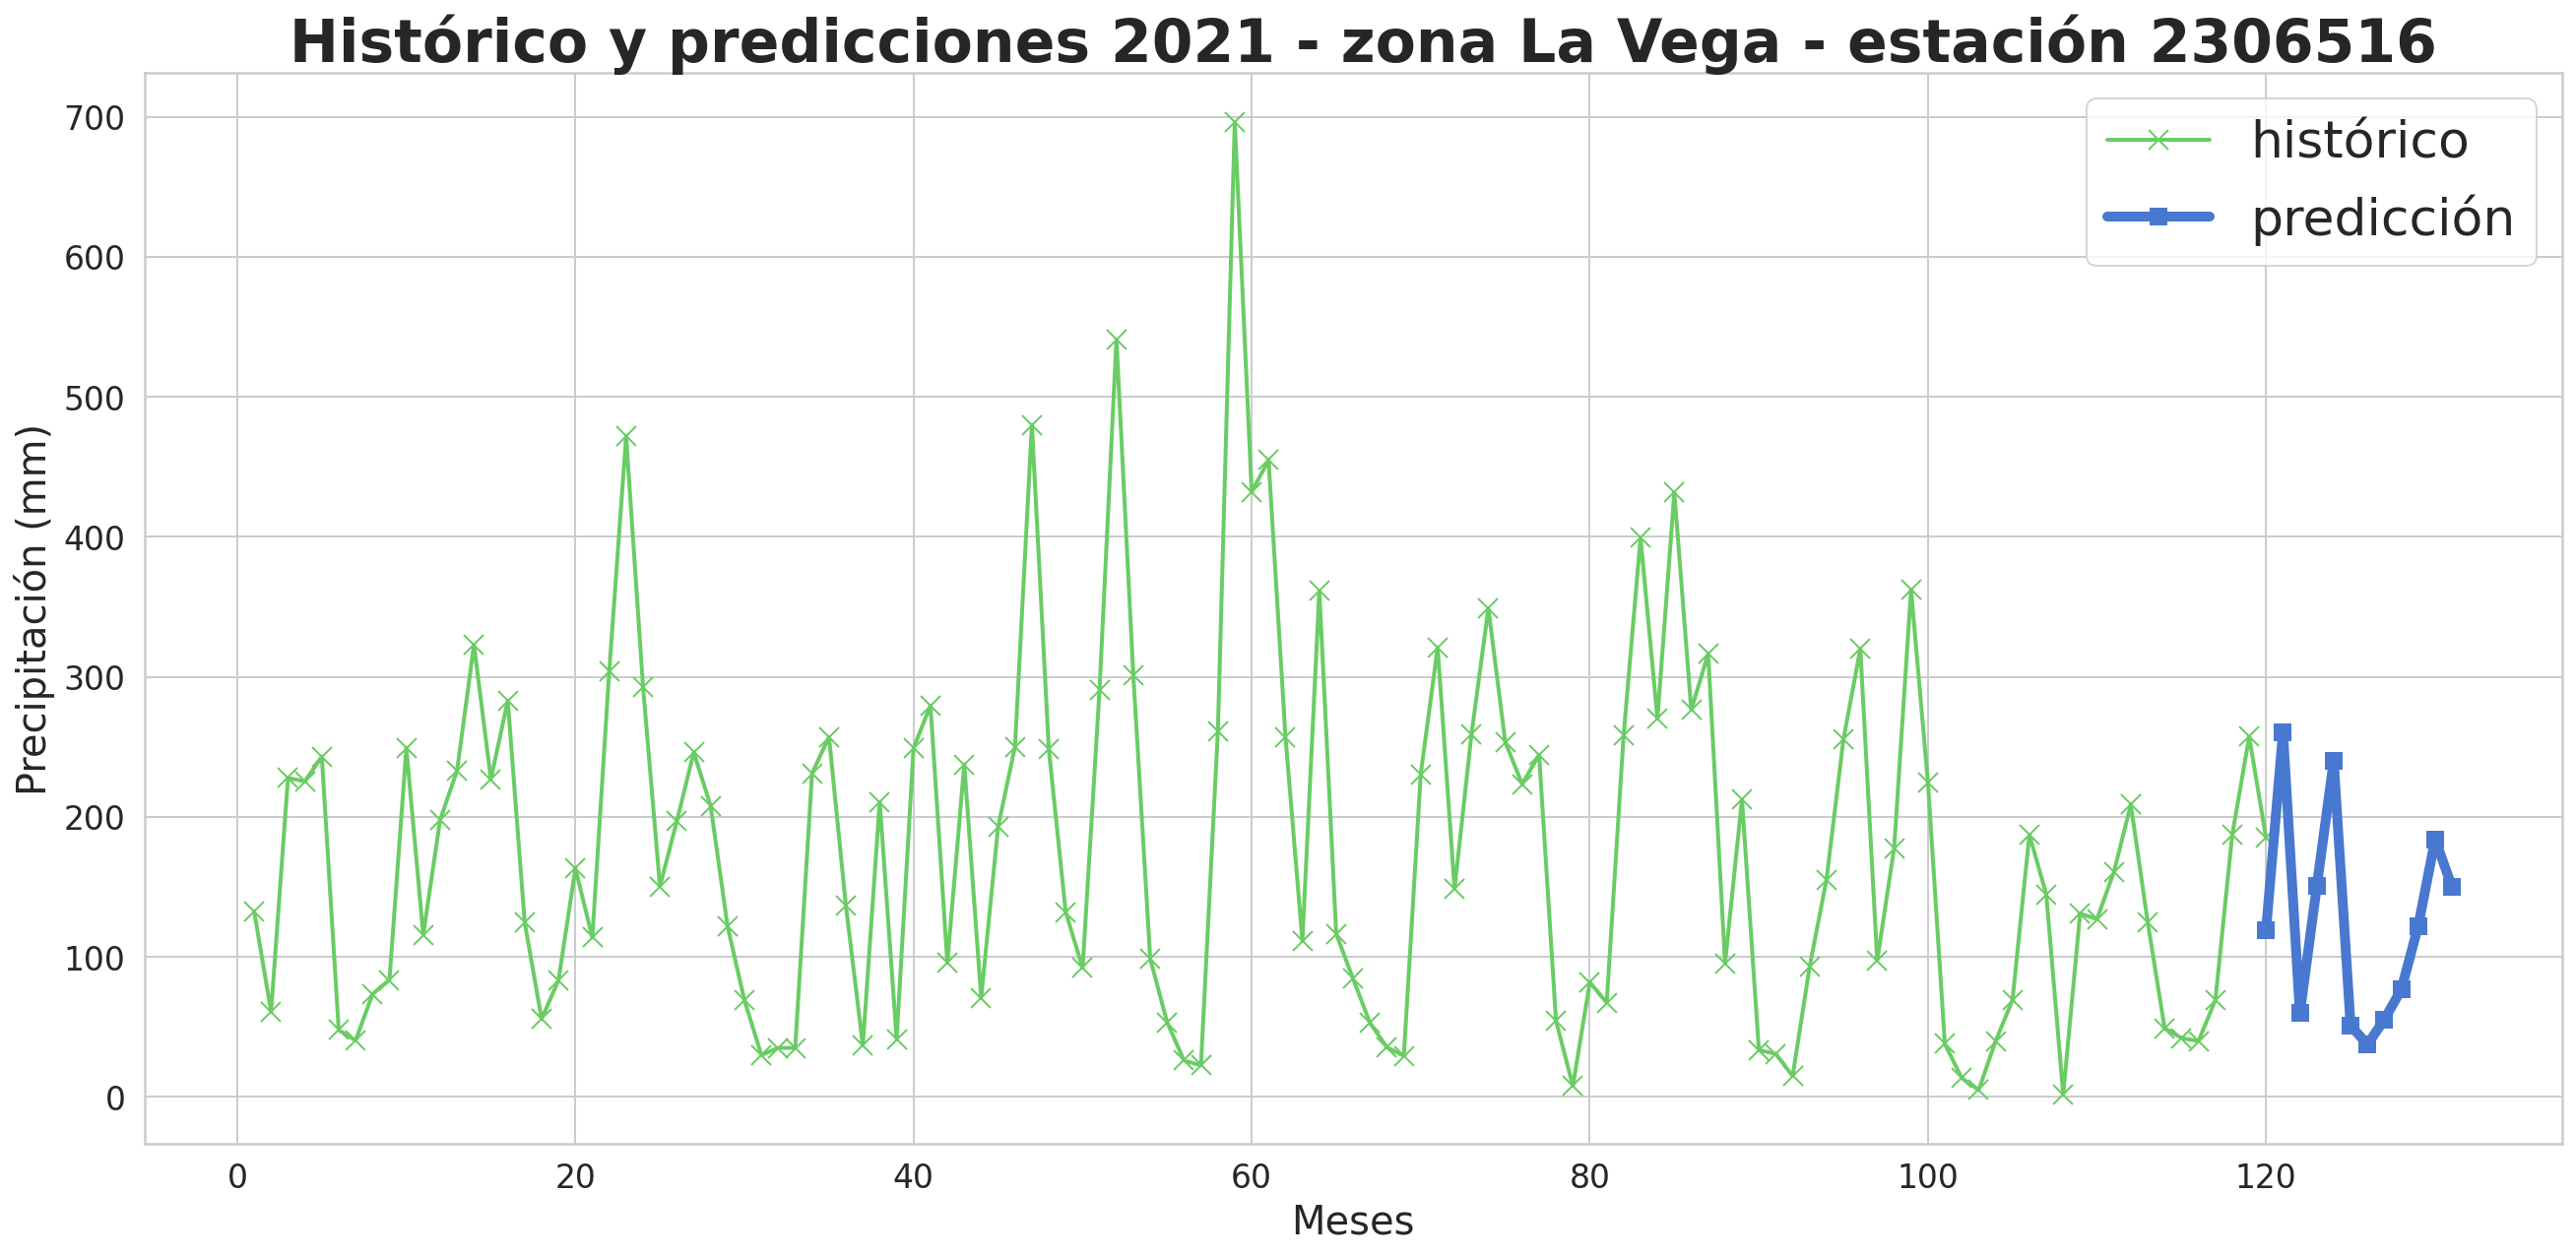

In [ ]:
#################### definicion estacion #######################################
i = 18
cod_estacion = estaciones[i]
cod_zona = zonas[i]
#################### definicion estacion #######################################


################graphics properties####################################
%matplotlib inline
%config InlineBackend.figure_format='retina'
register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 22, 10
#################graphics properties####################################
#combine data & predictions

tam=120
esta = cod_estacion
dfh = df.copy() 
dfp = dfpred.copy()

dfhh = sqldf('select Anio, Mes, Estacion, Precipitacion from dfh where Estacion = '+ esta + '').sort_values(by=['Anio','Mes']).tail(tam)
dfpp = sqldf('select Anio, Mes, Estacion, Precipitacion from dfp where Estacion = '+ esta + '')
#df_t = pd.concat([dfhh,dfpp])


dfhh.insert(0, 'New_ID', range(1, 1 + tam))
dfpp.insert(0, 'New_ID', range(tam,tam+len(dfpp) ))


plt.plot(dfhh['New_ID'],dfhh['Precipitacion'] , 'g', marker='x',markersize= 10 ,label="histórico",linewidth=2 ,linestyle = '-')
plt.plot(dfpp['New_ID'],dfpp['Precipitacion'] , 'b', marker='s',markersize= 8,label="predicción",linewidth=5)
plt.ylabel('Precipitación (mm)' , fontsize=20 )
plt.xlabel('Meses', fontsize=20)
plt.title('Estación '+esta , loc = 'center')
plt.title(' Histórico y predicciones 2021 - zona '+cod_zona + ' '+ '- estación '+ cod_estacion ,fontweight="bold",fontsize = 30, loc = 'center')
plt.legend(prop={'size': 26} )
fig5 = cod_estacion+'_preddiciones.png'
plt.savefig(fig5)
files.download(fig5)
plt.show();

In [ ]:
#export fixed dataframe
#export csv file to local computer

total.to_csv(cod_estacion+'.csv',index=False)
files.download(cod_estacion+'.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

sqldf('select * from total where estacion = '+cod_estacion+' ')

,Fecha,Anio,Mes,Estacion,Precipitacion
0,2021-01-01,2021,1,2120548,12.969305
1,2021-02-01,2021,2,2120548,21.748430
2,2021-03-01,2021,3,2120548,63.984703
3,2021-04-01,2021,4,2120548,54.750111
4,2021-05-01,2021,5,2120548,97.345886
5,2021-06-01,2021,6,2120548,116.514122
6,2021-07-01,2021,7,2120548,102.222351
7,2021-08-01,2021,8,2120548,82.002716
8,2021-09-01,2021,9,2120548,75.172424
9,2021-10-01,2021,10,2120548,82.531883


In [ ]:
#save model

filename = cod_estacion+'.h5'
modelo.save(filename) 
files.download(filename)

#load model
#ff = cod_estacion+'_.h5'
#modelo2 = tf.keras.models.load_model(ff)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>